In [96]:
import numpy as np

### Loss and Cost Functions

In [97]:
def loss(y, yhat):
    yloss = -1 * (((1-y) * np.log(1-yhat)) + (y * np.log(yhat)))
    return yloss   

def cost(Y, Yhat):
    Jcost = np.sum(loss(Y, Yhat))/Y.shape[0]
    return Jcost

### Activation Functions

In [98]:
def unit_activation(yhat):    
    return yhat
unit_activation = np.vectorize(unit_activation)

def sigmoid_activation(yhat):    
    return 1/(1+np.exp(-yhat))
sigmoid_activation = np.vectorize(sigmoid_activation)

def relu_activation(yhat):    
    return yhat * (yhat > 0)
relu_activation = np.vectorize(relu_activation)

def TanH(x):
    top = np.exp(x) - np.exp(-x)
    bottom = np.exp(x) + np.exp(-x)
    final = top/bottom
    return final
TanH = np.vectorize(TanH)

In [99]:
def derTanH(x):
    v = 1 - ((TanH(x))**2)
    return v
derTanH = np.vectorize(derTanH)

### Create Matrices for Train and Test Data

In [100]:
X = np.genfromtxt('pattern_rand.csv',delimiter=',', skip_header=True)[0:320,0:2].T 
Y = np.genfromtxt('pattern_rand.csv',delimiter=',', skip_header=True)[0:320,2:3].T 

Xt = np.genfromtxt('pattern_rand.csv',delimiter=',', skip_header=True)[320:400,0:2].T 
Yt = np.genfromtxt('pattern_rand.csv',delimiter=',', skip_header=True)[320:400,2:3].T 
    
n = X.shape[0]
m = X.shape[1]
t = Xt.shape[1]

print("Number of Features: ", n)
print("Number of Training Examples: ", m)
print("Number of Test Examples: ", t)

Number of Features:  2
Number of Training Examples:  320
Number of Test Examples:  80


### Initialization and Running Forward Propagation 

In [101]:
#Iterations
h = 1000
alpha = 0.3
# Initialization of J and Yhat
J = np.zeros((1,h))

In [102]:
# IL0: Number of inputs to Layer 0
# NL0: Number of neurons in Layer 0
IL0 = n
NL0 = n
# The first layer is input layer so both number of inputs 
# and number of neurons are equal to number of features

# IL1: Number of inputs to Layer 1
# NL1: Number of neurons in Layer 1
IL1 = NL0
NL1 = 12
# As there are n neurons in the previous layer, the number
# of inputs to Layer 1 is equal to n. Number of neurons
# may be any. 

# IL2: Number of inputs to Layer 2
# NL2: Number of neurons in Layer 2
IL2 = NL1
NL2 = 1
# Number of inputs in Layer 2 equals to number of neurons in
# the previous layer (one input coming from each neuron). As 
# this is binary classification with a single output, the number 
# of neurons equals 1. 

print("Network Structure:")
print("IL0: Number of inputs to Layer 0:", IL0)
print("NL0: Number of neurons in Layer 0:", NL0)
print("IL1: Number of inputs to Layer 1:", IL1)
print("NL1: Number of neurons in Layer 1:", NL1)
print("IL2: Number of inputs to Layer 2:", IL2)
print("NL2: Number of neurons in Layer 2:", NL2)


Network Structure:
IL0: Number of inputs to Layer 0: 2
NL0: Number of neurons in Layer 0: 2
IL1: Number of inputs to Layer 1: 2
NL1: Number of neurons in Layer 1: 12
IL2: Number of inputs to Layer 2: 12
NL2: Number of neurons in Layer 2: 1


In [103]:
# Layer 0 is input layer so W0 is identity matrix while B0 is zero matrix.
# Layer 0 in a way simply reproduces its inputs at the output
np.random.seed(0)
B0 = np.zeros((NL0, 1))
W0 = np.identity((NL0))

# Layer 1 is a passthrough layer. As number of inputs to the layer equals
# 2 and number of neurons are 4, the size of W1 will be 4 x2. To make this
# layer a passthrough layer, the 4 x 2 W1 matrix needs to consist of a 
# a 2 x 2 identity matrix and a 2 x 2 zero matrix. Also B1 is a zero matrix
B1 = np.random.rand(NL1,1)
W1 =np.random.rand(NL1,IL1)


# Layer 2 is a simple Logistic Regression Unit. W2 and B2 are intialized as ones.
B2 = np.random.rand(NL2,1)
W2 = np.random.rand(NL2,IL2)

print("Weights and Biases:")
print("Layer 0: ")
print("B0\n", B0)
print("W0\n", W0)
print("Layer 1: ")
print("B1\n", B1)
print("W1\n", W1)
print("Layer 2: ")
print("B2\n", B2)
print("W2\n", W2)

Weights and Biases:
Layer 0: 
B0
 [[0.]
 [0.]]
W0
 [[1. 0.]
 [0. 1.]]
Layer 1: 
B1
 [[0.5488135 ]
 [0.71518937]
 [0.60276338]
 [0.54488318]
 [0.4236548 ]
 [0.64589411]
 [0.43758721]
 [0.891773  ]
 [0.96366276]
 [0.38344152]
 [0.79172504]
 [0.52889492]]
W1
 [[0.56804456 0.92559664]
 [0.07103606 0.0871293 ]
 [0.0202184  0.83261985]
 [0.77815675 0.87001215]
 [0.97861834 0.79915856]
 [0.46147936 0.78052918]
 [0.11827443 0.63992102]
 [0.14335329 0.94466892]
 [0.52184832 0.41466194]
 [0.26455561 0.77423369]
 [0.45615033 0.56843395]
 [0.0187898  0.6176355 ]]
Layer 2: 
B2
 [[0.61209572]]
W2
 [[0.616934   0.94374808 0.6818203  0.3595079  0.43703195 0.6976312
  0.06022547 0.66676672 0.67063787 0.21038256 0.1289263  0.31542835]]


In [104]:
# We now runs a loop for performing forward- and backpropagation
for g in range(h):
    # Forward propagation 
    X0 = X
    G0 = np.matmul(W0,X0) + B0
    H0 = unit_activation(G0)
    
    #Layer 1
    X1 = H0
    G1 = np.matmul(W1,X1) + B1
    H1 = TanH(G1)
    
    #Layer 3
    X2 = H1
    G2 = np.matmul(W2,X2) + B2
    H2 = sigmoid_activation(G2)
    Yhat = H2

    # Determine Cost
    J[0,g] = cost(Y, Yhat)/m
    
    # Layer 2 Backpropagation 
    dJdG2 = Yhat - Y
    dJdB2 =  np.sum(dJdG2, axis = 1, keepdims = True)/m 
    dJdW2 = np.matmul(dJdG2, X2.T)/m
    B2 = B2 - alpha * dJdB2
    W2 = W2 - alpha * dJdW2
    
    #Layer 1 Backward Prop 
    dJdG1 = np.matmul(W2.T, dJdG2) * derTanH(G1)
    dJdB1 =  np.sum(dJdG1, axis = 1, keepdims = True)/m 
    dJdW1 = np.matmul(dJdG1, X1.T)/m
    B1 = B1 - alpha * dJdB1
    W1 = W1 - alpha * dJdW1

Yhat = np.dot(W1,X1) + B1
Yhat = TanH(Yhat)
Yhat = np.dot(W2, X2) + B2
Yhat = sigmoid_activation(Yhat)
J[0][g] = np.sum(loss(Y, Yhat))/m
    
print("Jcost = {}".format(J[0,h-1]))
print("B2 = {}".format(B2))
print("W2 = ", W2)

Jcost = 0.30196115946862073
B2 = [[0.07931825]]
W2 =  [[ 1.26248658  3.69278534  2.20661077 -1.48460239 -1.45698165  1.38810279
  -0.53930412  1.79822875  0.10141899 -0.51314716 -0.96334129 -0.4425899 ]]


Jcost = 0.6636268397430334  
B2 = [[-0.00078031]]  
W2 =  [[ 0.08056205 -0.24098459  1.          1.        ]]

### Plotting Cost Function

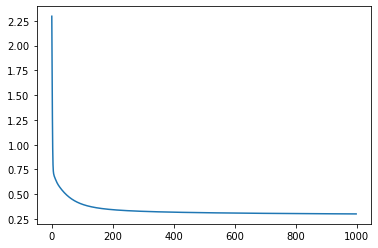

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(J[0, 0:h-1])
plt.show()

In [106]:
#Making Predictions

X0 = Xt
G0 = np.matmul(W0,X0) + B0
H0 = unit_activation(G0)
    
X1 = H0
G1 = np.matmul(W1,X1) + B1
H1 = TanH(G1)
Yhat1 = H1
    
    
#Layer 2
X2 = H1
G2 = np.matmul(W2,X2) + B2
Ythat = sigmoid_activation(G2)
Ythis = []

for i in range(Xt.shape[1]):
    if Ythat[0,i] >= 0.5:
        Ythis.append(1.0)
    else:
        Ythis.append(0.0)
Ythis = np.array(Ythis).T

In [107]:
total = Yt.shape[1]
error = np.sum(abs(Yt - Ythis))
print("Accuracy: {}%".format((total-error)*100/total))

Accuracy: 87.5%
